```
Name :- Ravi Kumar Sinha
Roll No. :- 20065138 
Department :- Civil Engineering 
Email Id :- ravikumar.sinha.cd.civ20@itbhu.ac.in 
```











**CE - 291** \
**Exploratory Project** \
**2021-22**

**Topic** :- `Data Analysis on how online shopping influences our Transportation Services.` 

**Description** :- `As we know the exponential growth of online shopping increasing day by day.`

`Many people wants to buy the product online as of they get huge selection and variety of products with easy mode of payment most importantly they also get "Fast Delivery Services and Replacement Services".`

`As you notice for betterment and satisfaction of the customer almost all the Online Store needs a well developed "Transportation Services System".`








**Analysis** :- `Here I am going to do Sentimental Analysis on "Online Shopping" as well as "Delivery Services System" under the following listed parameters :-`\
`1.   Sentimental Analysis on online shopping before covid pandemic.`\
`2. Sentimental Analysis on online shopping during covid pandemic.`\
`3. Sentimental Analysis on willingness of adpoting online shopping .`\
`4. Sentimental analysis on delivery Services System in online shopping.`
 








**Outcomes** :- `At last I am going to do "Comparison of Sentimental Analysis" on following listed parameters` :-\
`1. Comparison of Sentimental analysis on online shopping between before covid pandemic verses during covid pandemic.`
`2. Comparison of Sentimental analysis on online shopping Willingness  verses Delivery Services.`\
`3. Comparison of Sentimental analysis on online shopping between the all four parameters.`\




`Finally I am going to calculate "Percentage Sentimental Analysis" on 'Positive_willingness_onlineshopping' verses 'Negative_deliveryservices_onlineshopping'`

**Tools** :- 

*   `Python`
*   `snscrape to extract data(tweets) from Twitter.`
*   `numpy, pandas to do numerical and logistic as well as sentimental analysis.`
*   `matplotlib for graph and data visualisation.`
    
    `and many more...`



#Install : Libraries

In [ ]:
!pip install pandas
!pip install numpy
!pip install pycountry
!pip install langdetect
!pip install snscrape

!pip install nltk

#Import : Libraries

In [ ]:
import snscrape
import pandas as pd
import numpy as np
from textblob import TextBlob
from wordcloud import WordCloud
import re
import sys
import string
import pycountry
import matplotlib.pyplot as plt
import snscrape.modules.twitter as sntwitter
plt.style.use('fivethirtyeight')

import nltk
from wordcloud import WordCloud,STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer

nltk.download('vader_lexicon')

nltk.download('stopwords')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Function : Subjectivity and Polarity

In [ ]:
def getSubjectivity(twt):
  return TextBlob(twt).sentiment.subjectivity

def getPolarity(twt):
  return TextBlob(twt).sentiment.polarity

#Function : Sentiment 

In [ ]:
def getSentiment(value):
  if value < 0:
    return 'Negative'
  elif value > 0:
    return 'Positive'
  else:
    return 'Neutral'

#Function : cleanTwt

In [ ]:
def cleanTwt(twt):
  twt = re.sub('RT', '', twt)
  twt = re.sub('#[A-Za-z0-9]+', '', twt)
  twt = re.sub('\\n', '', twt)
  twt = re.sub('https?:\/\/\S+', '', twt)
  twt = re.sub('@[\S]*', '', twt)
  twt = re.sub('^[\s] +|[\s]+$', '', twt)
  return twt

#Function : WordCloud

In [ ]:
#Function to Create Wordcloud
def create_wordcloud(text):
 #mask = np.array(Image.open("cloud.png"))
 stopwords = set(STOPWORDS)
 wc = WordCloud(background_color="white",
 max_words=3000,
 stopwords=stopwords,
 repeat=True)
 wc.generate(str(text))
 wc.to_file("wc.png")
 print("Word Cloud Saved Successfully")
 path="wc.png"
 display(Image.open(path))

#(1). Sentimental Analysis on online shopping before covid pandemic.

### Scraping Tweets : snscrape

In [ ]:

# Creating list to append tweet data to scrape data from the Twitter 
tweets_list1 = []

# Using TwitterSearchScraper to scrape data and append tweets to list
for i,tweet in enumerate(sntwitter.TwitterSearchScraper('online shopping since:2018-01-01 until:2019-12-31').get_items()):
    if i>5000:
        break
    tweets_list1.append([tweet.date, tweet.id, tweet.content, tweet.username])
    
# Creating a dataframe from the tweets list above
tweets_df1 = pd.DataFrame(tweets_list1, columns=['Datetime', 'Tweet Id', 'Tweets', 'Username'])

tweets_df1

,Datetime,Tweet Id,Tweets,Username
0,2019-12-30 23:59:08+00:00,1211798907359047681,#onlineshopping Women's Street Style Hoodie in...,AddToMyCart1
1,2019-12-30 23:58:17+00:00,1211798696192462848,#chef #cheflife #chefknife #chefs #chefslife #...,KanchanaMarimu1
2,2019-12-30 23:56:56+00:00,1211798352901427200,#Online_Shopping Quick Charging Micro USB Cabl...,smartelectrox
3,2019-12-30 23:55:55+00:00,1211798096734240771,2020 we ARE NOT online shopping anymore...,garenreese
4,2019-12-30 23:55:40+00:00,1211798037137383424,@sabya_chirper India is a big market.. the mid...,ddash_ca
...,...,...,...,...
4996,2019-12-27 18:51:24+00:00,1210634299667550211,I know my bank card details w out even looking...,saskiamurphy__
4997,2019-12-27 18:50:57+00:00,1210634187671252993,#yingyang a Afili yorumu 🙈😀 #kolye #cokafili ...,afilibyafife
4998,2019-12-27 18:50:00+00:00,1210633947522240512,Get your 'Sequin Lace Jumpsuit' at the all new...,GITIONLINE
4999,2019-12-27 18:49:19+00:00,1210633777501933571,I gotta stop online shopping 🛍💸🤦🏼‍♀️,em_19xx


In [ ]:
tweets_df1['Cleaned_Tweets'] = tweets_df1['Tweets'].apply(cleanTwt)

tweets_df1

,Datetime,Tweet Id,Tweets,Username,Cleaned_Tweets
0,2019-12-30 23:59:08+00:00,1211798907359047681,#onlineshopping Women's Street Style Hoodie in...,AddToMyCart1,Women's Street Style Hoodie in Multiple Varia...
1,2019-12-30 23:58:17+00:00,1211798696192462848,#chef #cheflife #chefknife #chefs #chefslife #...,KanchanaMarimu1,…
2,2019-12-30 23:56:56+00:00,1211798352901427200,#Online_Shopping Quick Charging Micro USB Cabl...,smartelectrox,_Shopping Quick Charging Micro USB Cable for A...
3,2019-12-30 23:55:55+00:00,1211798096734240771,2020 we ARE NOT online shopping anymore...,garenreese,2020 we ARE NOT online shopping anymore...
4,2019-12-30 23:55:40+00:00,1211798037137383424,@sabya_chirper India is a big market.. the mid...,ddash_ca,India is a big market.. the middle class is t...
...,...,...,...,...,...
4996,2019-12-27 18:51:24+00:00,1210634299667550211,I know my bank card details w out even looking...,saskiamurphy__,I know my bank card details w out even looking...
4997,2019-12-27 18:50:57+00:00,1210634187671252993,#yingyang a Afili yorumu 🙈😀 #kolye #cokafili ...,afilibyafife,a Afili yorumu 🙈😀 Vadi Istanbul
4998,2019-12-27 18:50:00+00:00,1210633947522240512,Get your 'Sequin Lace Jumpsuit' at the all new...,GITIONLINE,Get your 'Sequin Lace Jumpsuit' at the all new...
4999,2019-12-27 18:49:19+00:00,1210633777501933571,I gotta stop online shopping 🛍💸🤦🏼‍♀️,em_19xx,I gotta stop online shopping 🛍💸🤦🏼‍♀️


### tweets_list1 : Cleaned_Tweets

In [ ]:
tweets_df1 = pd.DataFrame(tweets_df1['Cleaned_Tweets'], columns = ['Cleaned_Tweets'])

tweets_df1.drop_duplicates(inplace=True)
idx = list(range(0, len(tweets_df1)))
tweets_df1 = tweets_df1.set_index(pd.Index(idx))

tweets_df1

,Cleaned_Tweets
0,Women's Street Style Hoodie in Multiple Varia...
1,…
2,_Shopping Quick Charging Micro USB Cable for A...
3,2020 we ARE NOT online shopping anymore...
4,India is a big market.. the middle class is t...
...,...
4042,I know my bank card details w out even looking...
4043,a Afili yorumu 🙈😀 Vadi Istanbul
4044,Get your 'Sequin Lace Jumpsuit' at the all new...
4045,I gotta stop online shopping 🛍💸🤦🏼‍♀️


### tweets_list1 : Subjectivity & Polarity

In [ ]:
tweets_df1['Subjectivity'] = tweets_df1['Cleaned_Tweets'].apply(getSubjectivity)
tweets_df1['Polarity'] = tweets_df1['Cleaned_Tweets'].apply(getPolarity)

tweets_df1

,Cleaned_Tweets,Subjectivity,Polarity
0,Women's Street Style Hoodie in Multiple Varia...,0.000000,0.000000
1,…,0.000000,0.000000
2,_Shopping Quick Charging Micro USB Cable for A...,0.500000,0.333333
3,2020 we ARE NOT online shopping anymore...,0.000000,0.000000
4,India is a big market.. the middle class is t...,0.456250,0.112500
...,...,...,...
4042,I know my bank card details w out even looking...,0.000000,0.000000
4043,a Afili yorumu 🙈😀 Vadi Istanbul,0.000000,0.000000
4044,Get your 'Sequin Lace Jumpsuit' at the all new...,0.454545,0.170455
4045,I gotta stop online shopping 🛍💸🤦🏼‍♀️,0.000000,0.000000


### tweet_list1 : Scatter Plot : Subjectivity VS Polarity

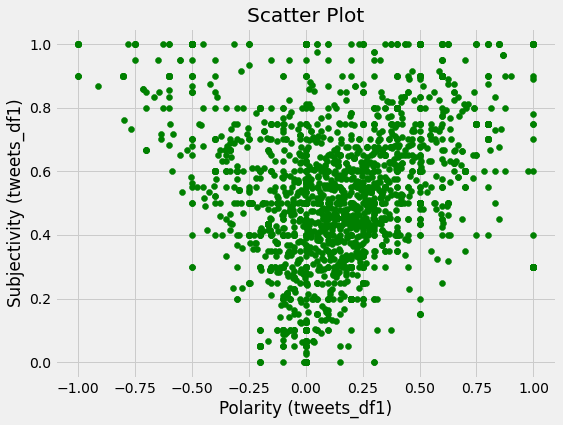

In [ ]:
#create a scatter plot of the subjectivity and polarity (tweets_df1)
plt.figure(figsize = (8,6))
for i in range(0, len(tweets_df1)):
  plt.scatter(tweets_df1['Polarity'][i], tweets_df1['Subjectivity'][i], color = 'green')
plt.title('Scatter Plot')
plt.xlabel('Polarity (tweets_df1)')
plt.ylabel('Subjectivity (tweets_df1)')
plt.show()

### tweets_list1 : Sentiment

In [ ]:
tweets_df1['Sentiment'] = tweets_df1['Polarity'].apply(getSentiment)
tweets_df1

,Cleaned_Tweets,Subjectivity,Polarity,Sentiment
0,Women's Street Style Hoodie in Multiple Varia...,0.000000,0.000000,Neutral
1,…,0.000000,0.000000,Neutral
2,_Shopping Quick Charging Micro USB Cable for A...,0.500000,0.333333,Positive
3,2020 we ARE NOT online shopping anymore...,0.000000,0.000000,Neutral
4,India is a big market.. the middle class is t...,0.456250,0.112500,Positive
...,...,...,...,...
4042,I know my bank card details w out even looking...,0.000000,0.000000,Neutral
4043,a Afili yorumu 🙈😀 Vadi Istanbul,0.000000,0.000000,Neutral
4044,Get your 'Sequin Lace Jumpsuit' at the all new...,0.454545,0.170455,Positive
4045,I gotta stop online shopping 🛍💸🤦🏼‍♀️,0.000000,0.000000,Neutral


### tweets_list1 : Sentiment : Bar Graph

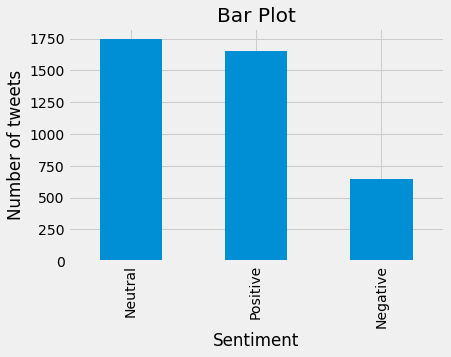

In [ ]:
tweets_df1['Sentiment'].value_counts().plot(kind='bar')
plt.title('Bar Plot')
plt.xlabel('Sentiment')
plt.ylabel('Number of tweets')
plt.show()

### tweets_list1 : tweet_count : percentage

In [ ]:
def count_values_in_column(data,feature):
 total=data.loc[:,feature].value_counts(dropna=False)
 percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
 return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])
#Count_values for sentiment
count_values_in_column(tweets_df1,"Sentiment")

,Total,Percentage
Neutral,1746,43.14
Positive,1652,40.82
Negative,649,16.04


### tweets_list1 : tweet_count : pie chart

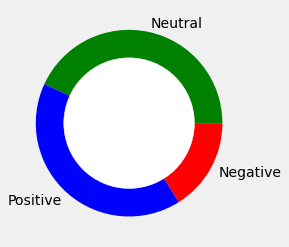

In [ ]:
# create data for Pie Chart
pc = count_values_in_column(tweets_df1,"Sentiment")
names= pc.index
size=pc["Percentage"]
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=['green','blue','red'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

### tweets_list1 : WordCloud

Word Cloud Saved Successfully


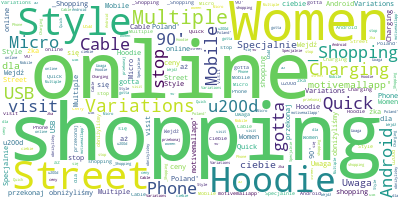

In [ ]:
create_wordcloud(tweets_df1["Cleaned_Tweets"].values)

# (2). Sentimental Analysis on online shopping during covid pandemic.

### Scraping tweets : snscrape

In [ ]:

# Creating list to append tweet data to
tweets_list2 = []

# Using TwitterSearchScraper to scrape data and append tweets to list
for i,tweet in enumerate(sntwitter.TwitterSearchScraper('online shopping in covid19 since:2020-01-01 until:2022-01-31').get_items()):
    if i>5000:
        break
    tweets_list2.append([tweet.date, tweet.id, tweet.content, tweet.username])
    
# Creating a dataframe from the tweets list above
tweets_df2 = pd.DataFrame(tweets_list2, columns=['Datetime', 'Tweet Id', 'Tweets', 'Username'])
tweets_df2

NameError: ignored

In [ ]:
tweets_df2['Cleaned_Tweets'] = tweets_df2['Tweets'].apply(cleanTwt)

tweets_df2.tail()

NameError: ignored

### tweet_list2 : Cleaned_Tweets

In [ ]:
tweets_df2 = pd.DataFrame(tweets_df2['Cleaned_Tweets'], columns = ['Cleaned_Tweets'])

tweets_df2.drop_duplicates(inplace=True)
idx = list(range(0, len(tweets_df2)))
tweets_df2 = tweets_df2.set_index(pd.Index(idx))

tweets_df2

,Cleaned_Tweets
0,Reminder! dont forget we have 10% off everythi...
1,up by 15% as avoid visiting in
2,The erosion of in . Retail vacancies were hig...
3,E-tailers and saw a significant jump in the...
4,As long as people take this covid19 for grante...
...,...
1317,What an amazing video showing deliveries of on...
1318,Positives of the outbreak so far:- Less traff...
1319,epidemic dampens entertainment sector in Chin...
1320,epidemic dampens entertainment sector in on ...


### tweet_list2 : Subjectivity & Polarity

In [ ]:
tweets_df2['Subjectivity'] = tweets_df2['Cleaned_Tweets'].apply(getSubjectivity)
tweets_df2['Polarity'] = tweets_df2['Cleaned_Tweets'].apply(getPolarity)

tweets_df2

,Cleaned_Tweets,Subjectivity,Polarity
0,Reminder! dont forget we have 10% off everythi...,0.000000,0.000000
1,up by 15% as avoid visiting in,0.000000,0.000000
2,The erosion of in . Retail vacancies were hig...,0.520000,0.230000
3,E-tailers and saw a significant jump in the...,0.862500,0.412500
4,As long as people take this covid19 for grante...,0.320408,0.057143
...,...,...,...
1317,What an amazing video showing deliveries of on...,0.900000,0.600000
1318,Positives of the outbreak so far:- Less traff...,0.333333,-0.039286
1319,epidemic dampens entertainment sector in Chin...,0.000000,0.000000
1320,epidemic dampens entertainment sector in on ...,0.000000,0.000000


### tweets_list2 : Scatter Plot : Subjectivity VS Polarity

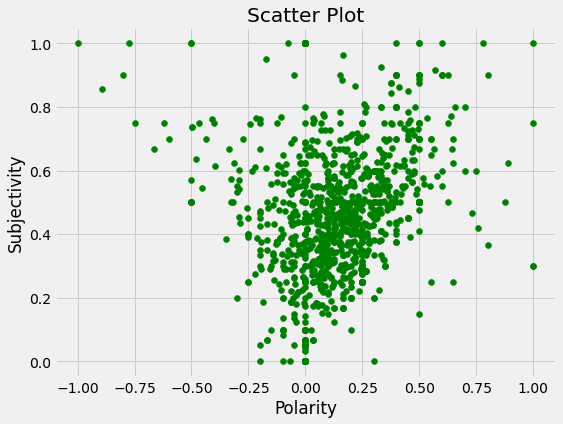

In [ ]:
#create a scatter plot of the subjectivity
plt.figure(figsize = (8,6))
for i in range(0, len(tweets_df2)):
  plt.scatter(tweets_df2['Polarity'][i], tweets_df2['Subjectivity'][i], color = 'green')
plt.title('Scatter Plot')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()


### tweets_list2 : Sentiment

In [ ]:
tweets_df2['Sentiment'] = tweets_df2['Polarity'].apply(getSentiment)
tweets_df2

,Cleaned_Tweets,Subjectivity,Polarity,Sentiment
0,Reminder! dont forget we have 10% off everythi...,0.000000,0.000000,Neutral
1,up by 15% as avoid visiting in,0.000000,0.000000,Neutral
2,The erosion of in . Retail vacancies were hig...,0.520000,0.230000,Positive
3,E-tailers and saw a significant jump in the...,0.862500,0.412500,Positive
4,As long as people take this covid19 for grante...,0.320408,0.057143,Positive
...,...,...,...,...
1317,What an amazing video showing deliveries of on...,0.900000,0.600000,Positive
1318,Positives of the outbreak so far:- Less traff...,0.333333,-0.039286,Negative
1319,epidemic dampens entertainment sector in Chin...,0.000000,0.000000,Neutral
1320,epidemic dampens entertainment sector in on ...,0.000000,0.000000,Neutral


### tweets_list2 : Sentiment : Bar Graph

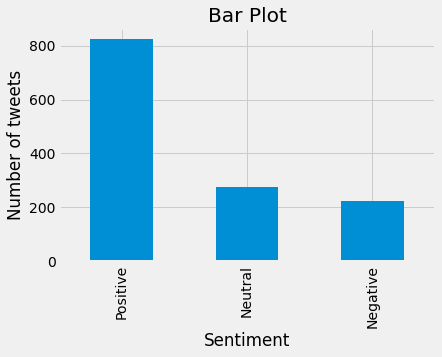

In [ ]:
tweets_df2['Sentiment'].value_counts().plot(kind='bar')
plt.title('Bar Plot')
plt.xlabel('Sentiment')
plt.ylabel('Number of tweets')
plt.show()

### tweets_list2 : tweet_count : percentage

In [ ]:
def count_values_in_column(data,feature):
 total=data.loc[:,feature].value_counts(dropna=False)
 percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
 return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])
#Count_values for sentiment
count_values_in_column(tweets_df2,"Sentiment")

,Total,Percentage
Positive,824,62.33
Neutral,276,20.88
Negative,222,16.79


### tweets_list2 : tweet_count : pie chart

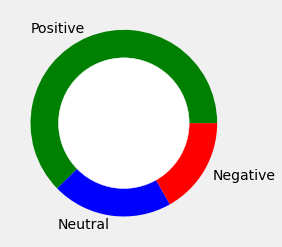

In [ ]:
# create data for Pie Chart
pc = count_values_in_column(tweets_df2,"Sentiment")
names= pc.index
size=pc["Percentage"]
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=['green','blue','red'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

### tweets_list12 : WordCloud

Word Cloud Saved Successfully


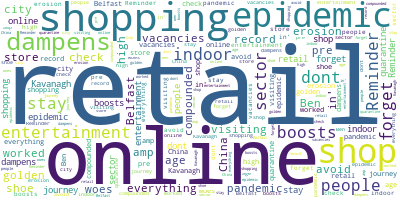

In [ ]:
create_wordcloud(tweets_df2["Cleaned_Tweets"].values)

#(3). Sentimental Analysis on willingness of adopting online shopping.

### Scraping tweets : snscrape

In [ ]:

# Creating list to append tweet data to
tweets_list3 = []

# Using TwitterSearchScraper to scrape data and append tweets to list
for i,tweet in enumerate(sntwitter.TwitterSearchScraper('online is better than offline shopping since:2018-01-01 until:2022-05-01').get_items()):
    if i>5000:
        break
    tweets_list3.append([tweet.date, tweet.id, tweet.content, tweet.username])
    
# Creating a dataframe from the tweets list above
tweets_df3 = pd.DataFrame(tweets_list3, columns=['Datetime', 'Tweet Id', 'Tweets', 'Username'])
tweets_df3

,Datetime,Tweet Id,Tweets,Username
0,2022-04-25 20:56:13+00:00,1518695398696792066,7 Reasons Why Online Shopping is Better Than O...,ethiothrones
1,2022-04-24 15:53:36+00:00,1518256852022308866,@seobrien @HEB @Favor @WholeFoods @amazon Won’...,hicheoo
2,2022-04-17 17:04:20+00:00,1515737940856606726,Reasons why shopping online is better than sho...,maagreensoft
3,2022-04-05 05:36:01+00:00,1511216064868368385,Online shopping is especially popular among pe...,MoreCustomerApp
4,2022-04-03 12:00:39+00:00,1510588084991188992,i found clothes im going to buy the clothes on...,leesbichan
...,...,...,...,...
112,2018-03-01 15:40:10+00:00,969235856656666624,Let Us Teach You The Tricks To Properly Shoppi...,RoosevelSimmons
113,2018-02-28 06:32:18+00:00,968735595756388353,“Prime is growing because we provide a better ...,USNewshawk
114,2018-02-01 03:18:51+00:00,958902439687720961,&gt;“Prime is growing because we provide a bet...,BigOnAnime
115,2018-01-26 11:58:33+00:00,956858896756494336,My answer to Is online shopping better than of...,resortnakshatra


In [ ]:
tweets_df3['Cleaned_Tweets'] = tweets_df3['Tweets'].apply(cleanTwt)

tweets_df3

,Datetime,Tweet Id,Tweets,Username,Cleaned_Tweets
0,2022-04-25 20:56:13+00:00,1518695398696792066,7 Reasons Why Online Shopping is Better Than O...,ethiothrones,7 Reasons Why Online Shopping is Better Than O...
1,2022-04-24 15:53:36+00:00,1518256852022308866,@seobrien @HEB @Favor @WholeFoods @amazon Won’...,hicheoo,Won’t be long before grocery shopping online i...
2,2022-04-17 17:04:20+00:00,1515737940856606726,Reasons why shopping online is better than sho...,maagreensoft,Reasons why shopping online is better than sho...
3,2022-04-05 05:36:01+00:00,1511216064868368385,Online shopping is especially popular among pe...,MoreCustomerApp,Online shopping is especially popular among pe...
4,2022-04-03 12:00:39+00:00,1510588084991188992,i found clothes im going to buy the clothes on...,leesbichan,i found clothes im going to buy the clothes on...
...,...,...,...,...,...
112,2018-03-01 15:40:10+00:00,969235856656666624,Let Us Teach You The Tricks To Properly Shoppi...,RoosevelSimmons,Let Us Teach You The Tricks To Properly Shoppi...
113,2018-02-28 06:32:18+00:00,968735595756388353,“Prime is growing because we provide a better ...,USNewshawk,“Prime is growing because we provide a better ...
114,2018-02-01 03:18:51+00:00,958902439687720961,&gt;“Prime is growing because we provide a bet...,BigOnAnime,&gt;“Prime is growing because we provide a bet...
115,2018-01-26 11:58:33+00:00,956858896756494336,My answer to Is online shopping better than of...,resortnakshatra,My answer to Is online shopping better than of...


### tweet_list3 : Cleaned_Tweets

In [ ]:
tweets_df3 = pd.DataFrame(tweets_df3['Cleaned_Tweets'], columns = ['Cleaned_Tweets'])

tweets_df3.drop_duplicates(inplace=True)
idx = list(range(0, len(tweets_df3)))
tweets_df3 = tweets_df3.set_index(pd.Index(idx))

tweets_df3

,Cleaned_Tweets
0,7 Reasons Why Online Shopping is Better Than O...
1,Won’t be long before grocery shopping online i...
2,Reasons why shopping online is better than sho...
3,Online shopping is especially popular among pe...
4,i found clothes im going to buy the clothes on...
...,...
96,Online shopping is better than old method conv...
97,Let Us Teach You The Tricks To Properly Shoppi...
98,“Prime is growing because we provide a better ...
99,&gt;“Prime is growing because we provide a bet...


### tweet_list3 : Subjectivity VS Polarity

In [ ]:
tweets_df3['Subjectivity'] = tweets_df3['Cleaned_Tweets'].apply(getSubjectivity)
tweets_df3['Polarity'] = tweets_df3['Cleaned_Tweets'].apply(getPolarity)

tweets_df3

,Cleaned_Tweets,Subjectivity,Polarity
0,7 Reasons Why Online Shopping is Better Than O...,0.500000,0.500000
1,Won’t be long before grocery shopping online i...,0.466667,0.150000
2,Reasons why shopping online is better than sho...,0.500000,0.500000
3,Online shopping is especially popular among pe...,0.500000,0.500000
4,i found clothes im going to buy the clothes on...,0.550000,0.600000
...,...,...,...
96,Online shopping is better than old method conv...,0.371429,0.171429
97,Let Us Teach You The Tricks To Properly Shoppi...,0.533333,0.354444
98,“Prime is growing because we provide a better ...,0.437500,0.187500
99,&gt;“Prime is growing because we provide a bet...,0.458333,0.125000


### tweet_list3 : Scatter Plot : Subjectivity VS Polarity

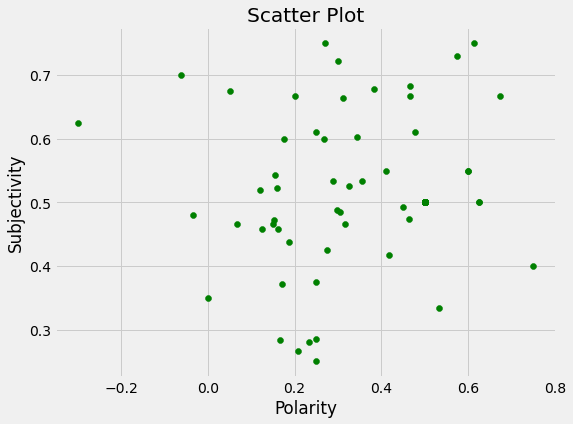

In [ ]:
#create a scatter plot of the subjectivity
plt.figure(figsize = (8,6))
for i in range(0, len(tweets_df3)):
  plt.scatter(tweets_df3['Polarity'][i], tweets_df3['Subjectivity'][i], color = 'green')
plt.title('Scatter Plot')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

### tweets_list3 : Sentiment

In [ ]:
tweets_df3['Sentiment'] = tweets_df3['Polarity'].apply(getSentiment)
tweets_df3

,Cleaned_Tweets,Subjectivity,Polarity,Sentiment
0,7 Reasons Why Online Shopping is Better Than O...,0.500000,0.500000,Positive
1,Won’t be long before grocery shopping online i...,0.466667,0.150000,Positive
2,Reasons why shopping online is better than sho...,0.500000,0.500000,Positive
3,Online shopping is especially popular among pe...,0.500000,0.500000,Positive
4,i found clothes im going to buy the clothes on...,0.550000,0.600000,Positive
...,...,...,...,...
96,Online shopping is better than old method conv...,0.371429,0.171429,Positive
97,Let Us Teach You The Tricks To Properly Shoppi...,0.533333,0.354444,Positive
98,“Prime is growing because we provide a better ...,0.437500,0.187500,Positive
99,&gt;“Prime is growing because we provide a bet...,0.458333,0.125000,Positive


### tweets_list3 : Sentiment : Bar Graph

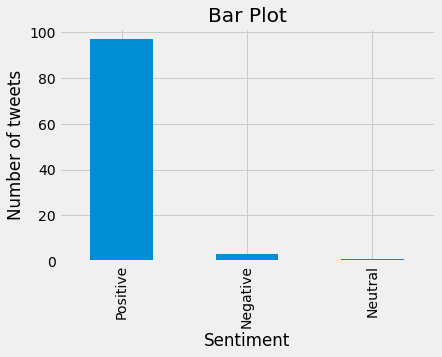

In [ ]:
tweets_df3['Sentiment'].value_counts().plot(kind='bar')
plt.title('Bar Plot')
plt.xlabel('Sentiment')
plt.ylabel('Number of tweets')
plt.show()

### tweets_list3 : tweet_count : percentage

In [ ]:
def count_values_in_column(data,feature):
 total=data.loc[:,feature].value_counts(dropna=False)
 percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
 return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])
#Count_values for sentiment
count_values_in_column(tweets_df3,"Sentiment")

,Total,Percentage
Positive,97,96.04
Negative,3,2.97
Neutral,1,0.99


### tweets_list3 : tweet_count : pie chart

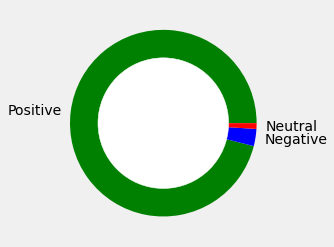

In [ ]:
# create data for Pie Chart
pc = count_values_in_column(tweets_df3,"Sentiment")
names= pc.index
size=pc["Percentage"]
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=['green','blue','red'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

### tweets_list3 : WordCloud

Word Cloud Saved Successfully


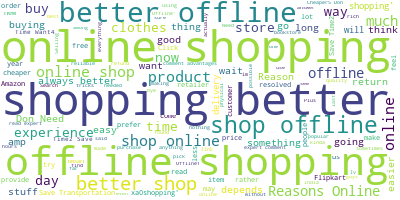

In [ ]:
create_wordcloud(tweets_df3["Cleaned_Tweets"].values)

#(4). Sentimental analysis on delivery Services System in online shopping.

### Scraping tweets : snscrape

In [ ]:

# Creating list to append tweet data to
tweets_list4 = []

# Using TwitterSearchScraper to scrape data and append tweets to list
for i,tweet in enumerate(sntwitter.TwitterSearchScraper('delivery services in online shopping since:2018-01-01 until:2022-05-01').get_items()):
    if i>5000:
        break
    tweets_list4.append([tweet.date, tweet.id, tweet.content, tweet.username])
    
# Creating a dataframe from the tweets list above
tweets_df4 = pd.DataFrame(tweets_list4, columns=['Datetime', 'Tweet Id', 'Tweets', 'Username'])
tweets_df4

,Datetime,Tweet Id,Tweets,Username
0,2022-04-24 15:56:00+00:00,1518257459265216514,Weekend #longreads: There’s no Amazon delivery...,restofworld
1,2022-04-20 22:00:06+00:00,1516899536341454856,There’s no Amazon delivery when you live on an...,restofworld
2,2022-04-17 09:02:24+00:00,1515616657456001031,@flipkartsupport it is in Vijayawada(delivery...,gvk0505
3,2022-04-16 10:04:15+00:00,1515269835856687105,"#WarRoom show on April 11, guest Jack Posobiec...",HAGnews2
4,2022-04-14 12:17:58+00:00,1514578708492963840,@TheChineseGovt Invest resources in aerial dro...,MiExecSearch
...,...,...,...,...
608,2018-04-13 06:36:20+00:00,984681676188954624,"@narendramodi sir, i am a sr citizen staying i...",scorpiomk
609,2018-04-04 18:41:28+00:00,981602670111809537,Why let silly things like facts into this?\n\n...,NealLeblanc
610,2018-02-18 21:05:00+00:00,965331338395078656,@sainsburys your delivery drivers are a credit...,gurr_lauren
611,2018-02-09 16:25:17+00:00,961999453665325057,(Disclosure: I work for FedEx.) Is there a poi...,AlexCPennington


In [ ]:
tweets_df4['Cleaned_Tweets'] = tweets_df4['Tweets'].apply(cleanTwt)

tweets_df4

,Datetime,Tweet Id,Tweets,Username,Cleaned_Tweets
0,2022-04-24 15:56:00+00:00,1518257459265216514,Weekend #longreads: There’s no Amazon delivery...,restofworld,Weekend : There’s no Amazon delivery when you ...
1,2022-04-20 22:00:06+00:00,1516899536341454856,There’s no Amazon delivery when you live on an...,restofworld,There’s no Amazon delivery when you live on an...
2,2022-04-17 09:02:24+00:00,1515616657456001031,@flipkartsupport it is in Vijayawada(delivery...,gvk0505,it is in Vijayawada(delivery location)But not ...
3,2022-04-16 10:04:15+00:00,1515269835856687105,"#WarRoom show on April 11, guest Jack Posobiec...",HAGnews2,"show on April 11, guest Jack Posobiec said th..."
4,2022-04-14 12:17:58+00:00,1514578708492963840,@TheChineseGovt Invest resources in aerial dro...,MiExecSearch,Invest resources in aerial drone delivery ser...
...,...,...,...,...,...
608,2018-04-13 06:36:20+00:00,984681676188954624,"@narendramodi sir, i am a sr citizen staying i...",scorpiomk,"sir, i am a sr citizen staying in b'luru. pin..."
609,2018-04-04 18:41:28+00:00,981602670111809537,Why let silly things like facts into this?\n\n...,NealLeblanc,Why let silly things like facts into this?I me...
610,2018-02-18 21:05:00+00:00,965331338395078656,@sainsburys your delivery drivers are a credit...,gurr_lauren,your delivery drivers are a credit to you-alw...
611,2018-02-09 16:25:17+00:00,961999453665325057,(Disclosure: I work for FedEx.) Is there a poi...,AlexCPennington,(Disclosure: I work for FedEx.) Is there a poi...


### tweet_list4 : Cleaned_Tweets

In [ ]:
tweets_df4 = pd.DataFrame(tweets_df4['Cleaned_Tweets'], columns = ['Cleaned_Tweets'])

tweets_df4.drop_duplicates(inplace=True)
idx = list(range(0, len(tweets_df4)))
tweets_df4 = tweets_df4.set_index(pd.Index(idx))

tweets_df4

,Cleaned_Tweets
0,Weekend : There’s no Amazon delivery when you ...
1,There’s no Amazon delivery when you live on an...
2,it is in Vijayawada(delivery location)But not ...
3,"show on April 11, guest Jack Posobiec said th..."
4,Invest resources in aerial drone delivery ser...
...,...
496,"sir, i am a sr citizen staying in b'luru. pin..."
497,Why let silly things like facts into this?I me...
498,your delivery drivers are a credit to you-alw...
499,(Disclosure: I work for FedEx.) Is there a poi...


### tweet_list4 : Subjectivity VS Polarity

In [ ]:
tweets_df4['Subjectivity'] = tweets_df4['Cleaned_Tweets'].apply(getSubjectivity)
tweets_df4['Polarity'] = tweets_df4['Cleaned_Tweets'].apply(getPolarity)

tweets_df4

,Cleaned_Tweets,Subjectivity,Polarity
0,Weekend : There’s no Amazon delivery when you ...,0.305556,0.064394
1,There’s no Amazon delivery when you live on an...,0.305556,0.064394
2,it is in Vijayawada(delivery location)But not ...,0.500000,0.500000
3,"show on April 11, guest Jack Posobiec said th...",0.129630,-0.085185
4,Invest resources in aerial drone delivery ser...,0.000000,0.000000
...,...,...,...
496,"sir, i am a sr citizen staying in b'luru. pin...",0.200000,-0.083333
497,Why let silly things like facts into this?I me...,0.840625,-0.053125
498,your delivery drivers are a credit to you-alw...,0.437500,0.109375
499,(Disclosure: I work for FedEx.) Is there a poi...,0.150000,0.100000


### tweet_list4 : Scatter Plot : Subjectivity VS Polarity

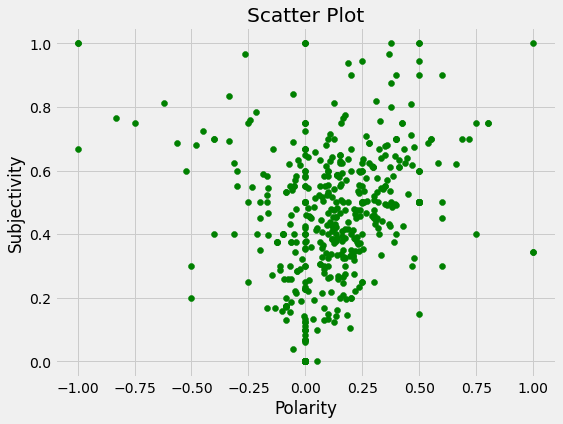

In [ ]:
#create a scatter plot of the subjectivity
plt.figure(figsize = (8,6))
for i in range(0, len(tweets_df4)):
  plt.scatter(tweets_df4['Polarity'][i], tweets_df4['Subjectivity'][i], color = 'green')
plt.title('Scatter Plot')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()


### tweets_list4 : Sentiment

In [ ]:
tweets_df4['Sentiment'] = tweets_df4['Polarity'].apply(getSentiment)
tweets_df4

,Cleaned_Tweets,Subjectivity,Polarity,Sentiment
0,Weekend : There’s no Amazon delivery when you ...,0.305556,0.064394,Positive
1,There’s no Amazon delivery when you live on an...,0.305556,0.064394,Positive
2,it is in Vijayawada(delivery location)But not ...,0.500000,0.500000,Positive
3,"show on April 11, guest Jack Posobiec said th...",0.129630,-0.085185,Negative
4,Invest resources in aerial drone delivery ser...,0.000000,0.000000,Neutral
...,...,...,...,...
496,"sir, i am a sr citizen staying in b'luru. pin...",0.200000,-0.083333,Negative
497,Why let silly things like facts into this?I me...,0.840625,-0.053125,Negative
498,your delivery drivers are a credit to you-alw...,0.437500,0.109375,Positive
499,(Disclosure: I work for FedEx.) Is there a poi...,0.150000,0.100000,Positive


### tweets_list4 : Sentiment : Bar Graph

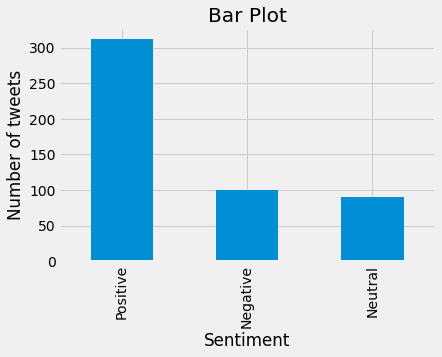

In [ ]:
tweets_df4['Sentiment'].value_counts().plot(kind='bar')
plt.title('Bar Plot')
plt.xlabel('Sentiment')
plt.ylabel('Number of tweets')
plt.show()

### tweets_list4 : tweet_count : percentage

In [ ]:
def count_values_in_column(data,feature):
 total=data.loc[:,feature].value_counts(dropna=False)
 percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
 return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])
#Count_values for sentiment
count_values_in_column(tweets_df4,"Sentiment")

,Total,Percentage
Positive,312,62.15
Negative,100,19.92
Neutral,90,17.93


### tweets_list4 : tweet_count : pie chart

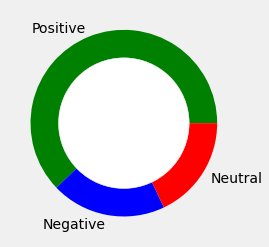

In [ ]:
# create data for Pie Chart
pc = count_values_in_column(tweets_df4,"Sentiment")
names= pc.index
size=pc["Percentage"]
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=['green','blue','red'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

### tweets_list4 : WordCloud

Word Cloud Saved Successfully


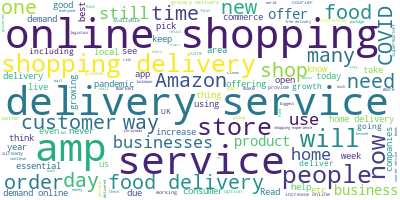

In [ ]:
create_wordcloud(tweets_df4["Cleaned_Tweets"].values)

# "Comparison of Sentimental Analysis"

## (1). Comparison of Sentimental analysis on online shopping between before covid pandemic verses during covid pandemic.

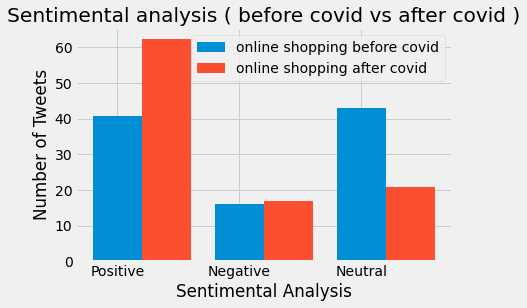

In [ ]:
w = 0.4
x = ["Positive", "Negative", "Neutral"]
tweets_df1 = [40.84, 16.05, 43.11]
tweets_df2 = [62.33, 16.79, 20.88]

bar1 = np.arange(len(x))

bar2= [i+w for i in bar1]

plt.bar(bar1, tweets_df1, w, label="online shopping before covid")
plt.bar(bar2, tweets_df2, w, label="online shopping after covid")

plt.xlabel("Sentimental Analysis")
plt.ylabel("Number of Tweets")
plt.title("Sentimental analysis ( before covid vs after covid )")
plt.xticks(bar1,x)
plt.legend()
plt.show()

## (2). Comparison of Sentimental analysis on online shopping Willingness verses Delivery Services.

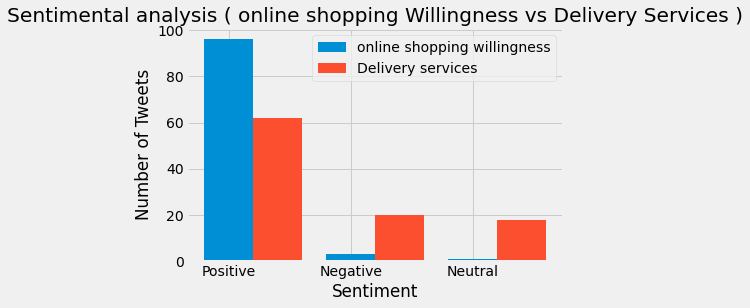

In [ ]:
w = 0.4
x = ["Positive", "Negative", "Neutral"]
tweets_df3 = [96.04, 2.97, 0.99]
tweets_df4 = [62.15, 19.92, 17.93]


bar1 = np.arange(len(x))

bar2= [i+w for i in bar1]

plt.bar(bar1, tweets_df3, w, label="online shopping willingness")
plt.bar(bar2, tweets_df4, w, label="Delivery services")

plt.xlabel("Sentiment")
plt.ylabel("Number of Tweets")
plt.title("Sentimental analysis ( online shopping Willingness vs Delivery Services )")
plt.xticks(bar1,x)
plt.legend()
plt.show()

## (3). Comparison of Sentimental analysis on online shopping between the all four parameters.

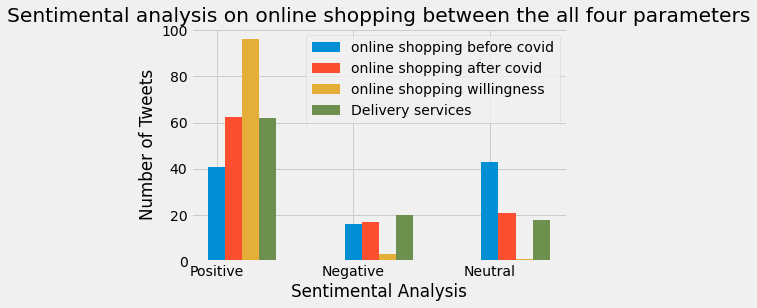

In [ ]:
w = 0.125
x = ["Positive", "Negative", "Neutral"]
tweets_df1 = [40.84, 16.05, 43.11]
tweets_df2 = [62.33, 16.79, 20.88]
tweets_df3 = [96.04, 2.97, 0.99]
tweets_df4 = [62.15, 19.92, 17.93]

bar1 = np.arange(len(x))

bar2= [i+w for i in bar1]
bar3= [i+w for i in bar2]
bar4= [i+w for i in bar3]

plt.bar(bar1, tweets_df1, w, label="online shopping before covid")
plt.bar(bar2, tweets_df2, w, label="online shopping after covid")
plt.bar(bar3, tweets_df3, w, label="online shopping willingness")
plt.bar(bar4, tweets_df4, w, label="Delivery services")

plt.xlabel("Sentimental Analysis")
plt.ylabel("Number of Tweets")
plt.title("Sentimental analysis on online shopping between the all four parameters")
plt.xticks(bar1,x)
plt.legend()
plt.show()

# "Percentage Sentimental Analysis" on 'Positive_willingness_online shopping' verses 'Negative_delivery services_online shopping'

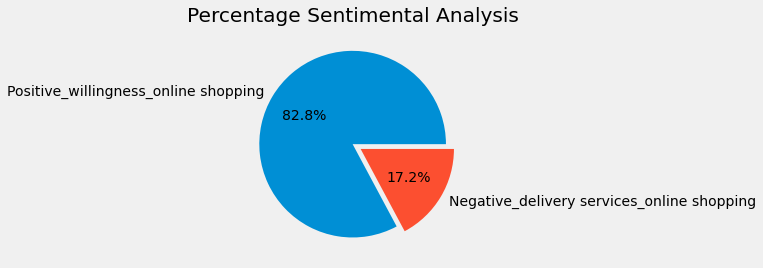

In [ ]:
Outcomes = [96.04, 19.92]
labels = ['Positive_willingness_online shopping', 'Negative_delivery services_online shopping']
exp = [0, 0.1]
plt.pie(Outcomes , labels=labels, explode = exp, autopct="%0.1f%%")
plt.title('Percentage Sentimental Analysis')
plt.show()


#Thank You



In [4]:
password = input('Enter the Password :- ')
if password == "20065138" :
  print("This project is created by Ravi Kumar Sinha (Civil Engineering)")

Enter the Password :- 20065138
This project is created by Ravi Kumar Sinha (Civil Engineering)
